In [2]:
library(mclust)
mc=Mclust(USArrests,4)
mc$classification

Warning message:
"package 'mclust' was built under R version 3.3.2"Package 'mclust' version 5.2
Type 'citation("mclust")' for citing this R package in publications.


Alabama         Alaska        Arizona       Arkansas     California 
             1              2              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              4              3              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              1              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              4              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              4              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              4              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              1              1              4              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             4              1              1              3              4 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              4              4              3

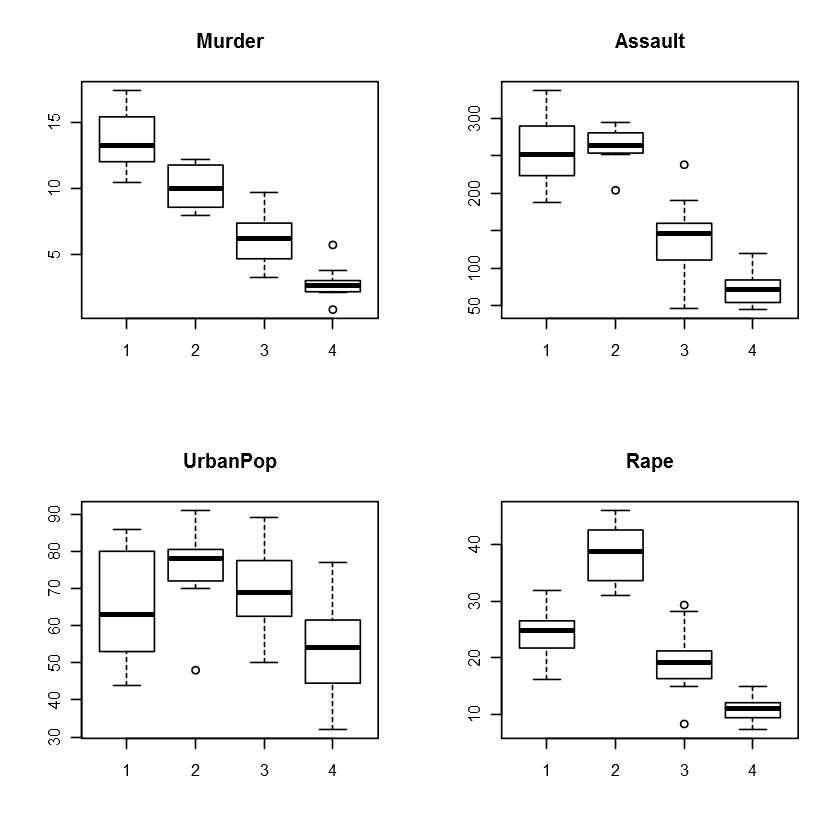

In [3]:
par(mfrow=c(2,2))
for (i in 1:4){
  boxplot(USArrests[,i]~mc$classification,main=names(USArrests)[i])
}

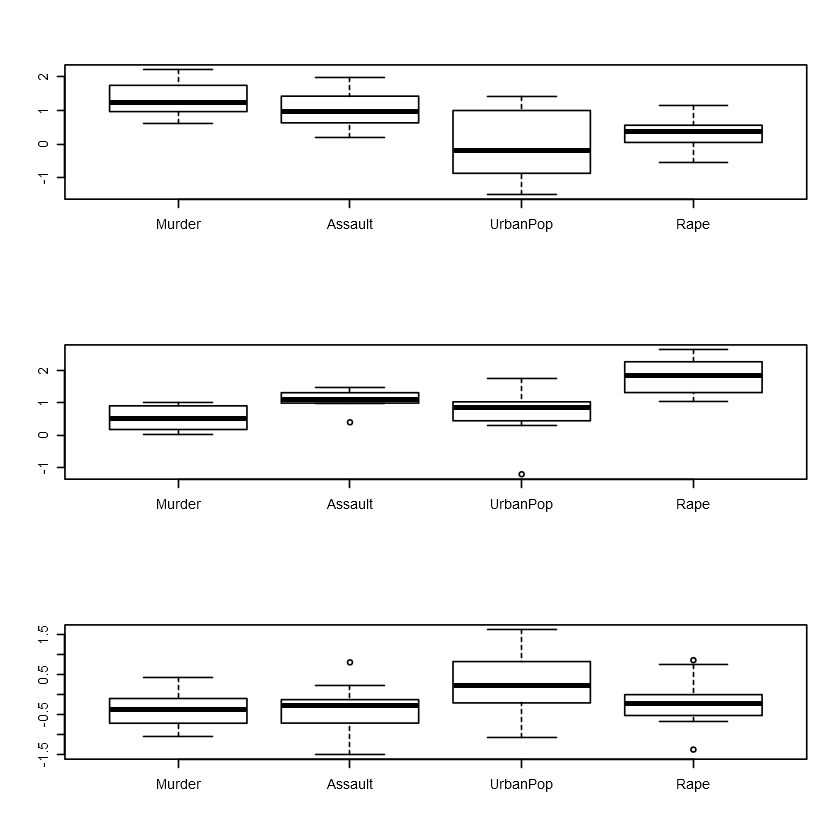

In [4]:
par(mfrow=c(3,1))
for (i in 1:3){
  USArrests_s=as.data.frame(scale(USArrests))
  boxplot(USArrests_s[mc$classification==i,])
}

In [5]:
library(psych)
result=describeBy(USArrests[,1],group=mc$classification,mat=T)

Warning message:
"package 'psych' was built under R version 3.3.2"
Attaching package: 'psych'

The following object is masked from 'package:mclust':

    sim



In [11]:
result

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X11,1,1,1,12,13.633333,2.154629,13.20,13.580000,2.96520,10.4,17.4,7.0,0.13273824,-1.3015688,0.6219877
X12,2,2,1,7,10.100000,1.833030,10.00,10.100000,2.81694,7.9,12.2,4.3,-0.01210775,-1.9978893,0.6928203
X13,3,3,1,20,6.250000,1.884424,6.15,6.231250,1.85325,3.2,9.7,6.5,0.10107316,-1.1001959,0.4213699
X14,4,4,1,11,2.736364,1.241187,2.60,2.622222,0.74130,0.8,5.7,4.9,0.91868644,0.5653512,0.3742320


Warning message:
"package 'ggplot2' was built under R version 3.3.2"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



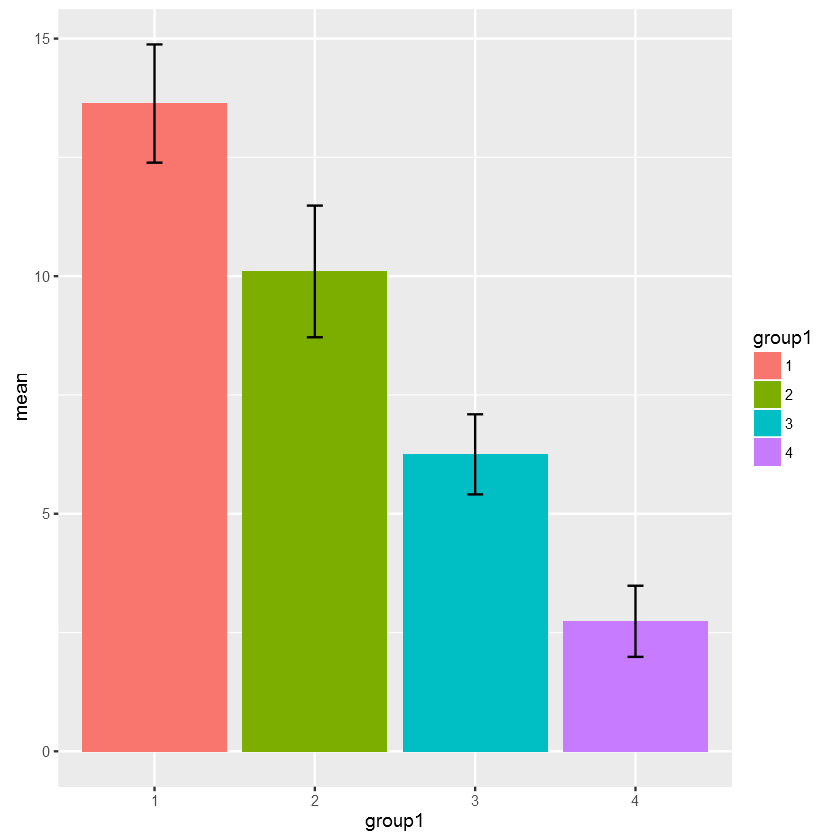

In [6]:
library(ggplot2)
ggplot(result,aes(x=group1,y=mean,fill=group1))+
  geom_bar(position=position_dodge() ,stat="identity")+
  geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se),width=0.1)

In [7]:
model=aov(USArrests$Murder~factor(mc$classification))
summary(model)
TukeyHSD(model)

                          Df Sum Sq Mean Sq F value Pr(>F)    
factor(mc$classification)  3  775.5  258.48   77.16 <2e-16 ***
Residuals                 46  154.1    3.35                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = USArrests$Murder ~ factor(mc$classification))

$`factor(mc$classification)`
          diff        lwr       upr     p adj
2-1  -3.533333  -5.853615 -1.213052 0.0010537
3-1  -7.383333  -9.164780 -5.601887 0.0000000
4-1 -10.896970 -12.933451 -8.860488 0.0000000
3-2  -3.850000  -5.992502 -1.707498 0.0001019
4-2  -7.363636  -9.722454 -5.004819 0.0000000
4-3  -3.513636  -5.344993 -1.682280 0.0000347


###

In [8]:
jet=read.csv("jet.csv")

In [9]:
mc2=Mclust(jet[,2:5],2)
summary(mc2)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEI (diagonal, equal volume and shape) model with 2 components:

 log.likelihood  n df       BIC       ICL
      -156.4029 22 13 -352.9894 -353.9347

Clustering table:
 1  2 
15  7 

In [10]:
mc3=Mclust(jet[,2:5],3)
summary(mc3)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components:

 log.likelihood  n df       BIC       ICL
      -139.3663 22 24 -352.9176 -352.9397

Clustering table:
 1  2  3 
 9 11  2 